# Given an image, show all boundig box annotations and their label names

## Access to Google drive folder 

Allow access to our drive

In [ ]:
# Drive in notebook
from google.colab import drive
drive.mount('/content/drive') # Mount the folder we want to access

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Import libraries

In [ ]:
from matplotlib import pyplot as plt  # to display the image (label name and boundig box)
import matplotlib.patches as patches # Bounding boxes
from PIL import Image

from collections import defaultdict # Dictionaries to handle the annotations
import json
import os 

Get annotations for image

In [ ]:
# Load json annotations file

DATA_PATH = '/content/drive/MyDrive/Colab Notebooks/Python_Projects/Portafolio/ComputerVision/Object_Detection/Waste_in_the wild/taco-trash-dataset/data'
file_name = 'annotations.json'
file_json = os.path.join(DATA_PATH, file_name)

with open(file_json, 'r') as json_file:
    data = json.load(json_file)

In [ ]:
# Get image id and create a list of dictionaries with annotation data
img_id_anns = defaultdict(list)

for ann in data['annotations']: 
    image_id = ann['image_id']
    img_id_anns[image_id].append(ann)

In [ ]:
# Get images names and add in a dict
dict_images = dict()
for img in data['images']:
    dict_images[img['file_name']] = img['id']

In [ ]:
# Mapping category_id to category name
category_id_to_name = dict()

for ann in data['categories']:
    category_id_to_name[ann['id']] = ann['name']

Select one image and show annotations

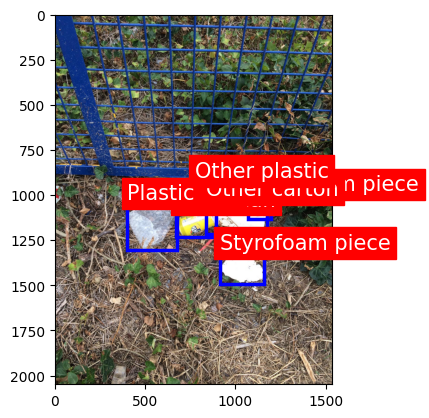

In [ ]:
img_path = '/content/drive/MyDrive/Colab Notebooks/Python_Projects/Portafolio/ComputerVision/Object_Detection/Waste_in_the wild/taco-trash-dataset/data/batch_1/000014.jpg' 

file_name = img_path.split('/')[-2] + '/' + img_path.split('/')[-1] # Get file name
img_id = dict_images[file_name] # Get image id
img_anns = img_id_anns[img_id] # Get annotations

# Visualize boxes and labels

img = Image.open(img_path)
fig, axes = plt.subplots()

for img_ann in img_anns:
    # Bbox coordinates
    bbox = img_ann['bbox']

    x = float(bbox[0])
    y = float(bbox[1])
    weight = float(bbox[2])
    height = float(bbox[3])

    # Category
    cat_name = category_id_to_name[img_ann['category_id']]

    # Plot
    plt.text(x, y-10, cat_name, fontdict={'fontsize':15.0, 'fontweight':'medium', 'color':'white', 'backgroundcolor':'red'})
    box = patches.Rectangle((x, y), weight, height, linewidth=2.5, edgecolor= 'blue', facecolor='none')
    axes.add_patch(box)

axes.imshow(img)